## Анализ датасета стоимости домов

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Загрузка данных

In [95]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [96]:
#Удалим не актуальные столбцы 
df.drop(columns=['sqft_living15', 'sqft_lot15'], inplace=True)

### Первичный анализ датасета

In [97]:
print('Первичный анализ (формат, качество и количество данных)\n')
df.info()

Первичный анализ (формат, качество и количество данных)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64 

In [98]:
print('Первичная статистика по датасету\n')
df.describe()

Первичная статистика по датасету



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


### Сбор дополнительных данных

In [99]:
#Размах стоимости
print(f"min = {df['price'].min()},\nmax = {df['price'].max()}")
#Размах этажности
print(df['floors'].value_counts())
#Размах дат постройки
print(f"Самый ранний - {df['yr_built'].min()}, самый поздний - {df['yr_built'].max()}")

min = 75000.0,
max = 7700000.0
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64
Самый ранний - 1900, самый поздний - 2015


### Ответы на вопросы заказчика

In [100]:
print('Средняя стоимость домов с двумя спальнями - ', round(df[df['bedrooms'] == 2]['price'].mean(), 2))
print('Средняя общая площадь домов, дороже 600 000 - ', round(df[df['price'] > 600000]['sqft_lot'].mean(), 2))
print('Количество домов, в которых был ремонт - ', round(df[df['yr_renovated'] != 0].shape[0], 2))
print('Средняя разница в цене между домами grade<4 и grade>6 - ', round(df[df['grade'] > 10]['price'].mean() - df[df['grade'] < 4]['price'].mean(), 2))
print('Количество домов с видом на набережную, минимум 3 ванными и подвалом - ', round(df[(df['waterfront'] == 1) & (df['bathrooms'] >= 3) & (df['sqft_basement'] > 0)].shape[0], 2))
print('Средняя оценка домов без подвала с двумя этажами до 150 000', round(df[(df['sqft_basement'] == 0) & (df['floors'] == 2) & (df['price'] < 150000)]['condition'].mean(), 2))

Средняя стоимость домов с двумя спальнями -  401372.68
Средняя общая площадь домов, дороже 600 000 -  20442.52
Количество домов, в которых был ремонт -  914
Средняя разница в цене между домами grade<4 и grade>6 -  1488885.12
Количество домов с видом на набережную, минимум 3 ванными и подвалом -  41
Средняя оценка домов без подвала с двумя этажами до 150 000 2.83


Клиент хочет дом либо с очень красивым видом из окна, либо с видом на набережную, в очень хорошем состоянии и год постройки не меньше 1980 года. В какой ценовом диапазоне будут дома?

In [101]:
result = df[((df['view'] == 4) | (df['waterfront'] == 1)) & (df['condition'] == 5) & (df['yr_built'] >= 1980)]
print(f"Цены с этими критериями:\nmin = {result['price'].min()}\nmax = {result['price'].max()}")

Цены с этими критериями:
min = 1295000.0
max = 3000000.0


In [102]:
print('Минимальная, средняя и максимальная стоимость домов \nв зависимости от оценки состояния\n\n', df.groupby('condition', as_index=False).agg({'price' : ['min', 'mean', 'max']}),'\n')
print('Сводная таблица по оценкам дома в зависимости от вида на море\n\n', df.pivot_table(index='view', columns='waterfront', values='id', aggfunc='count'),'\n')

Минимальная, средняя и максимальная стоимость домов 
в зависимости от оценки состояния

   condition     price                          
                  min           mean        max
0         1   78000.0  334431.666667  1500000.0
1         2   80000.0  327287.145349  2555000.0
2         3   75000.0  542012.578148  7062500.0
3         4   89000.0  521200.390033  7700000.0
4         5  110000.0  612418.089359  3650000.0 

Сводная таблица по оценкам дома в зависимости от вида на море

 waterfront        0      1
view                      
0           19489.0    NaN
1             331.0    1.0
2             955.0    8.0
3             491.0   19.0
4             184.0  135.0 



In [103]:
print('Таблица медианных стоимостей в зависимости от оценок дома и состояния\n\n', df.pivot_table(index='condition', columns='grade', values='price', aggfunc='median'),'\n')

Таблица медианных стоимостей в зависимости от оценок дома и состояния

 grade            1         3         4         5         6         7         8          9   \
condition                                                                                    
1          142000.0       NaN  150000.0  190000.0  255000.0  403500.0  932500.0        NaN   
2               NaN  280000.0  145000.0  180000.0  235000.0  305000.0  429000.0   715000.0   
3               NaN   75000.0  205000.0  234475.0  265000.0  357500.0  485000.0   689000.0   
4               NaN       NaN  238525.0  229975.0  295000.0  390000.0  571250.0   823500.0   
5               NaN  262000.0       NaN  227450.0  285475.0  456000.0  696000.0  1078000.0   

grade             10         11         12         13  
condition                                              
1                NaN        NaN        NaN        NaN  
2          1752500.0        NaN        NaN        NaN  
3           890000.0  1209500.0  1807500.0  2

### Распределения основных величин

Text(0, 0.5, 'Количество')

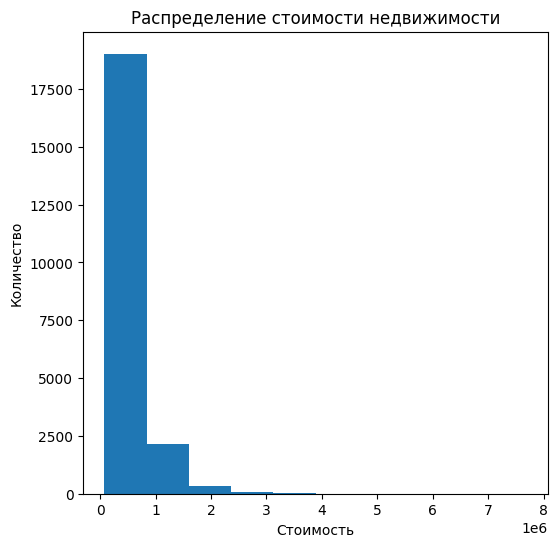

In [104]:
plt.figure(figsize=(6, 6))
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

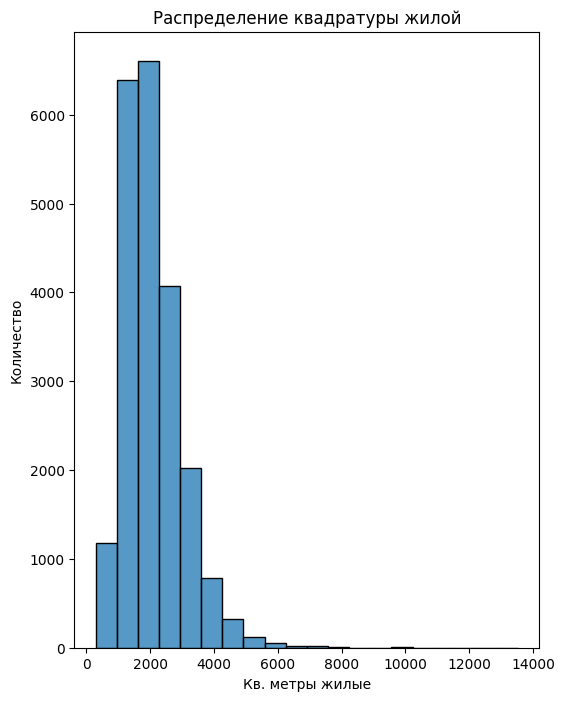

In [105]:
plt.figure(figsize=(6, 8))
sns.histplot(df['sqft_living'], bins=20)
plt.title('Распределение квадратуры жилой')
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

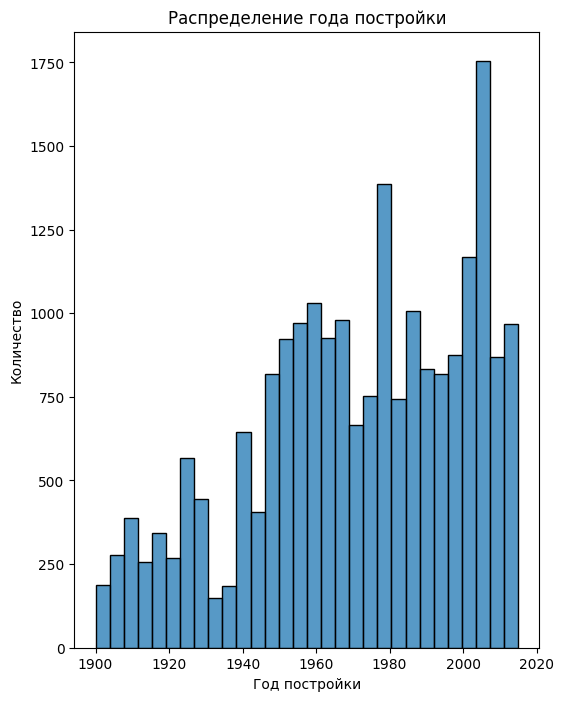

In [106]:
plt.figure(figsize=(6, 8))
sns.histplot(df['yr_built'], bins=30)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество')

Text(0.5, 1.0, 'Распределение по количеству этажей')

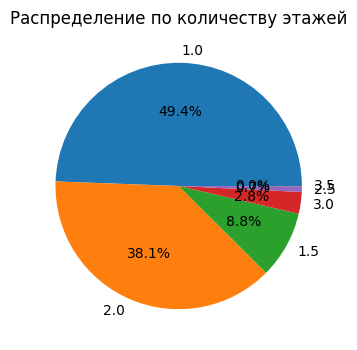

In [107]:
data = df['floors'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Распределение по количеству этажей')

Text(0.5, 1.0, 'Распределение по состоянию домов')

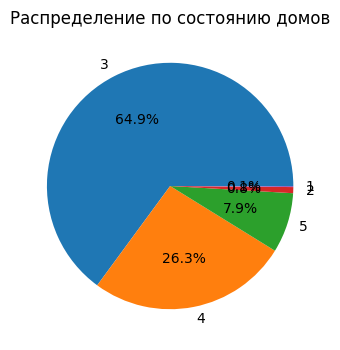

In [108]:
data = df['condition'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index)
plt.title('Распределение по состоянию домов')

### Влияние факторов на стоимость домов

Построение корреляционной матрицы признаков

In [109]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0


Для удобства визуализации применим тепловую карту

<Axes: >

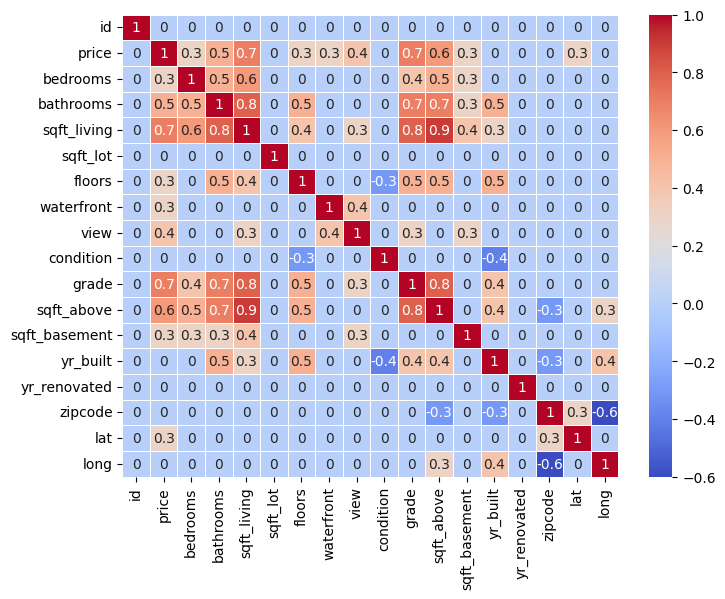

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

Посмотрим корреляцию жилой площади и стоимости

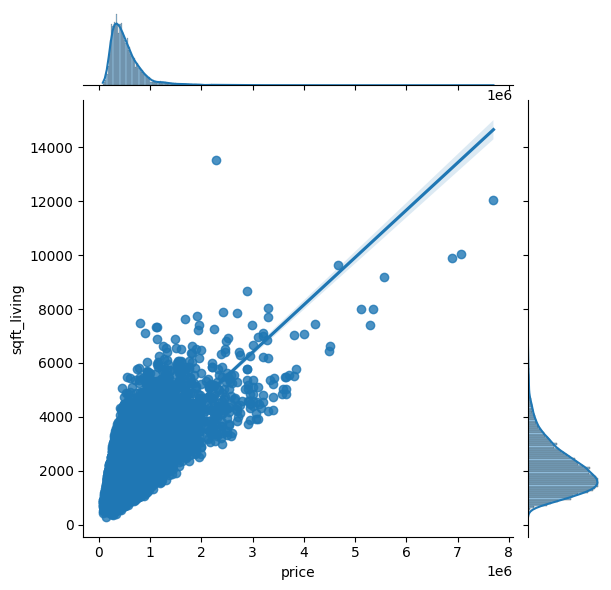

In [111]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')

Посмотрим на распределение общих оценок домов с учетом стоимости

C:\Users\Трейд_1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of price by view')

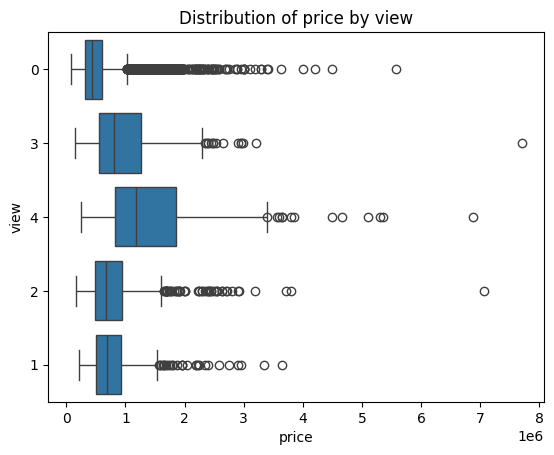

In [112]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('view')
plt.title('Distribution of price by view')

Добавим корреляцию оценок конструкции и дизайна со стоимостью

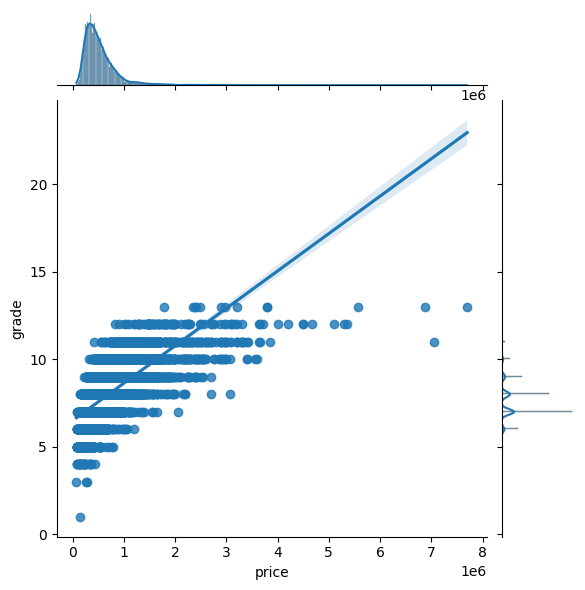

In [113]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg')

C:\Users\Трейд_1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of price by grade')

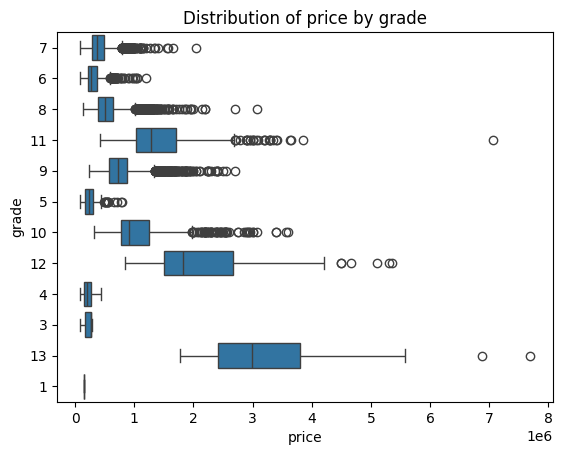

In [114]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Distribution of price by grade')

Таким образом, после рассмотрения корреляционных зависимостей вышеописанных факторов, имеем следующие выводы:

* Стоимость дома и его площадь находятся в прямой зависимости;
* Существенно повышают стоимость дома оценки состояния конструкций;
* Наибольший прирост стоимости дома получается при достижении им оценки 4 и выше